In [60]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [61]:
iris = load_iris()
X = iris.data  
y = iris.target  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
def compute_likelihood(X, mean, std):
    likelihood = np.prod(norm.pdf(X, mean, std))
    return likelihood

In [63]:
class NaiveBayesClassifier:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_probs = {}
        self.mean = {}
        self.std = {}

        for c in self.classes:
            X_c = X[y == c]
            self.class_probs[c] = len(X_c) / len(X)
            self.mean[c] = np.mean(X_c, axis=0)
            self.std[c] = np.std(X_c, axis=0)

    def predict(self, X):
        predictions = []
        posteriors = []

        for x in X:
            posteriors_per_instance = []

            for c in self.classes:
                likelihood = compute_likelihood(x, self.mean[c], self.std[c])
                posterior = self.class_probs[c] * likelihood
                posteriors_per_instance.append(posterior)

            predicted_class = self.classes[np.argmax(posteriors_per_instance)]
            predictions.append(predicted_class)
            posteriors.append(posteriors_per_instance)

        class_posteriors = {c: [] for c in self.classes}
        
        for posterior in posteriors:
            for i, p in enumerate(posterior):
                class_posteriors[self.classes[i]].append(p)

        mean_class_posteriors = {c: np.mean(class_posteriors[c], axis=0) for c in self.classes}
        plt.figure(figsize=(10, 6))
        plt.bar(range(len(mean_class_posteriors)), mean_class_posteriors.values())
        plt.xlabel('Classes')
        plt.ylabel('Probabilidade Média a Posteriori')
        plt.title('Probabilidade Média a Posteriori para Cada Classe')
        plt.xticks(range(len(mean_class_posteriors)), iris.target_names)
        plt.show()
        
        return predictions

In [64]:
def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [65]:
def confusion_matrix(y_true, y_pred):
    classes = np.unique(y_true)
    num_classes = len(classes)
    matrix = np.zeros((num_classes, num_classes), dtype=int)
    for i in range(num_classes):
        for j in range(num_classes):
            matrix[i, j] = np.sum((y_true == classes[i]) & (y_pred == classes[j]))
    return matrix

In [66]:
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state:
        np.random.seed(random_state)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    test_samples = int(len(X) * test_size)
    X_train = X[indices[:-test_samples]]
    X_test = X[indices[-test_samples:]]
    y_train = y[indices[:-test_samples]]
    y_test = y[indices[-test_samples:]]
    return X_train, X_test, y_train, y_test

In [67]:
def perform_realizations(classifier, X, y):
    accuracies = []
    confusion_matrices = []

    for _ in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=_)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        accuracies.append(acc)
        confusion_matrices.append(conf_matrix)

    accuracies = np.array(accuracies)
    mean_accuracy = np.mean(accuracies)
    std_dev_accuracy = np.std(accuracies)
    best_realization_idx = np.argmin(np.abs(accuracies - mean_accuracy))
    best_confusion_matrix = confusion_matrices[best_realization_idx]

    return mean_accuracy, std_dev_accuracy, best_realization_idx, best_confusion_matrix

In [68]:
def plot_decision_surface(clf, X_train, y_train, title):
    # Escolha dos dois primeiros atributos
    X_train = X_train[:, :2]
    
    # Treinar o classificador com os dois primeiros atributos
    clf.fit(X_train, y_train)

    # Criação da grade de pontos
    h = .02  # tamanho do passo na grade
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predição para cada ponto na grade
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Colocando o resultado na mesma forma que a grade
    Z = Z.reshape(xx.shape)

    # Plotagem das fronteiras de decisão
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

In [69]:

# Instanciando e treinando o classificador Naive Bayes
nb_classifier = NaiveBayesClassifier()
# nb_classifier.fit(X_train, y_train)

# # # Fazendo previsões e obtendo as probabilidades posteriores
# predictions, posteriors = nb_classifier.predict(X_test)
# class_posteriors = {c: [] for c in nb_classifier.classes}
# for posterior in posteriors:
#     for i, p in enumerate(posterior):
#         class_posteriors[nb_classifier.classes[i]].append(p)

# mean_class_posteriors = {c: np.mean(class_posteriors[c], axis=0) for c in nb_classifier.classes}

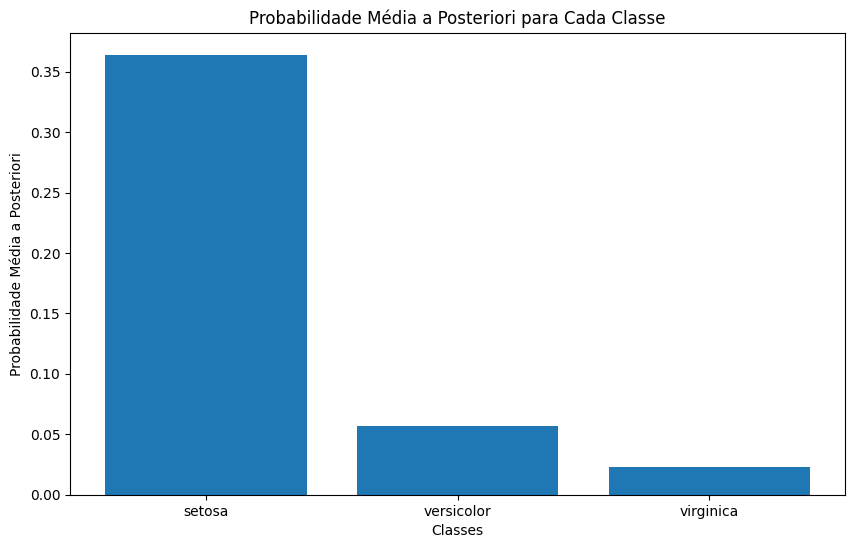

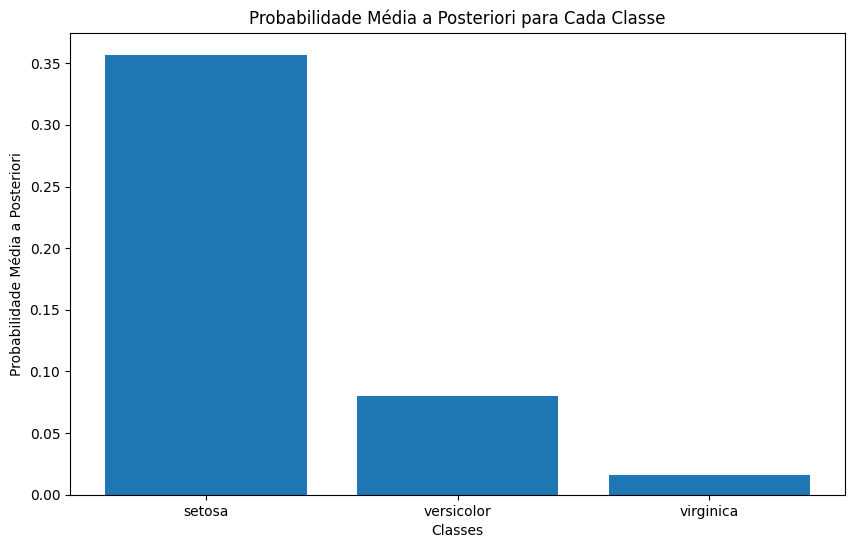

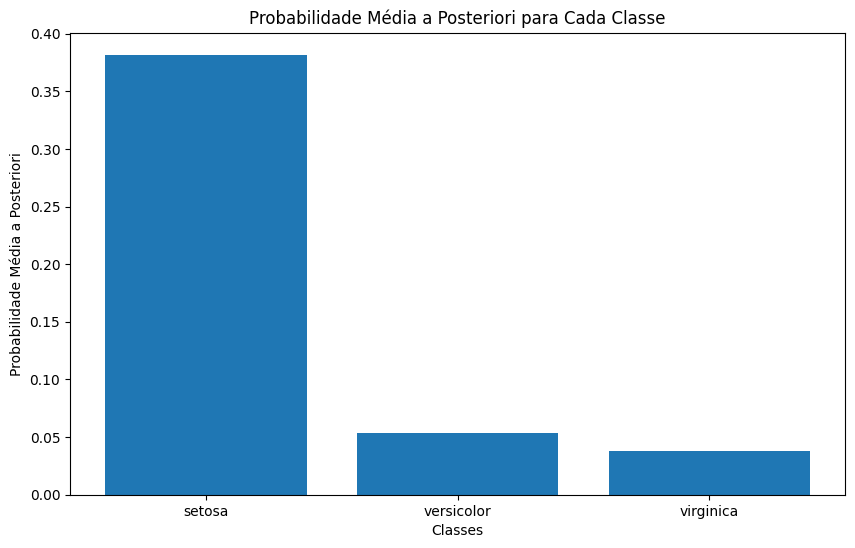

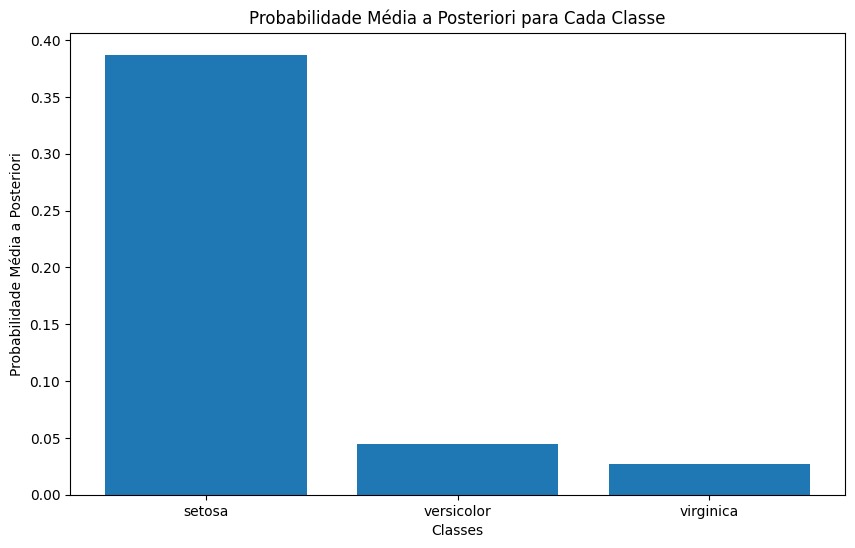

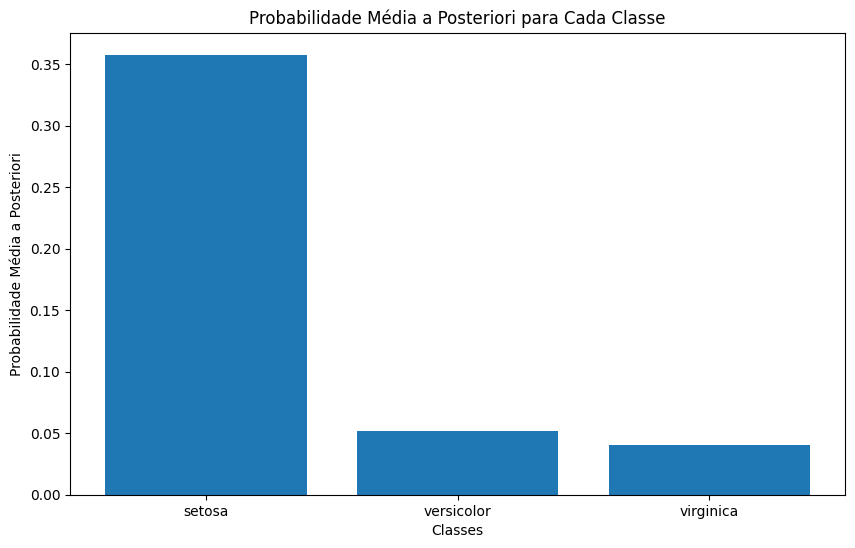

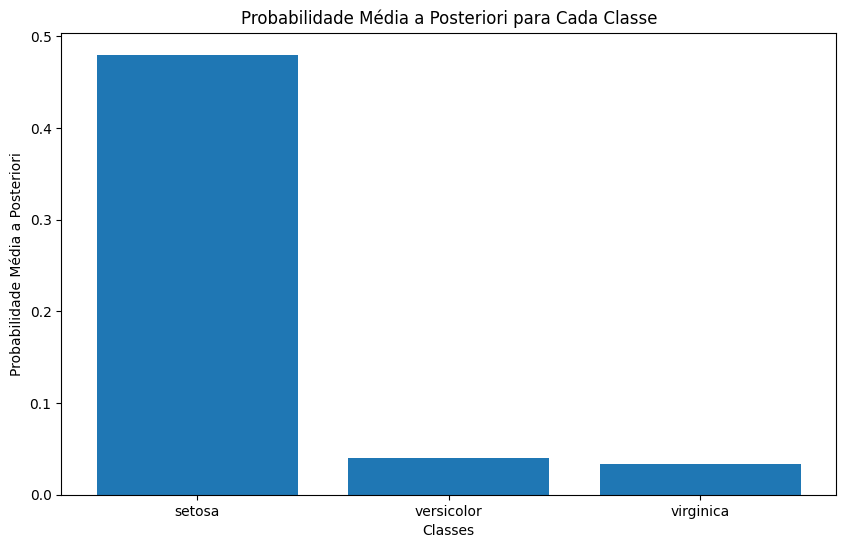

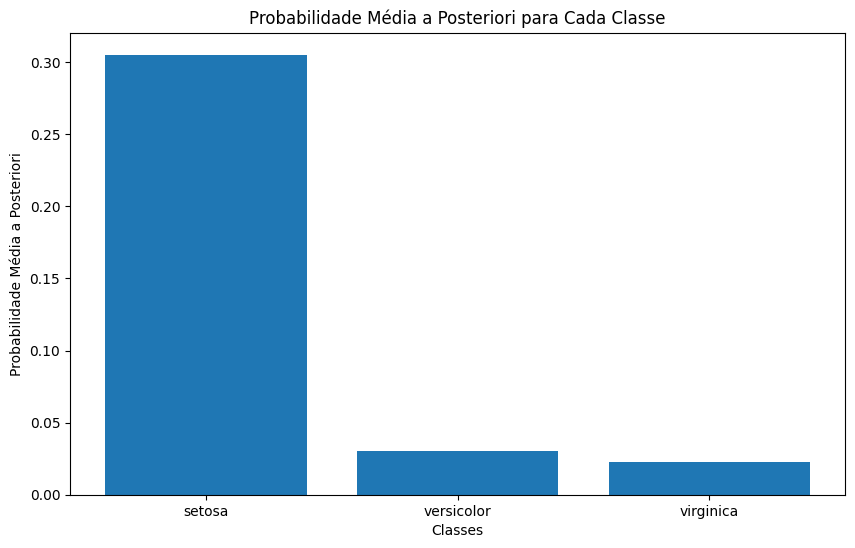

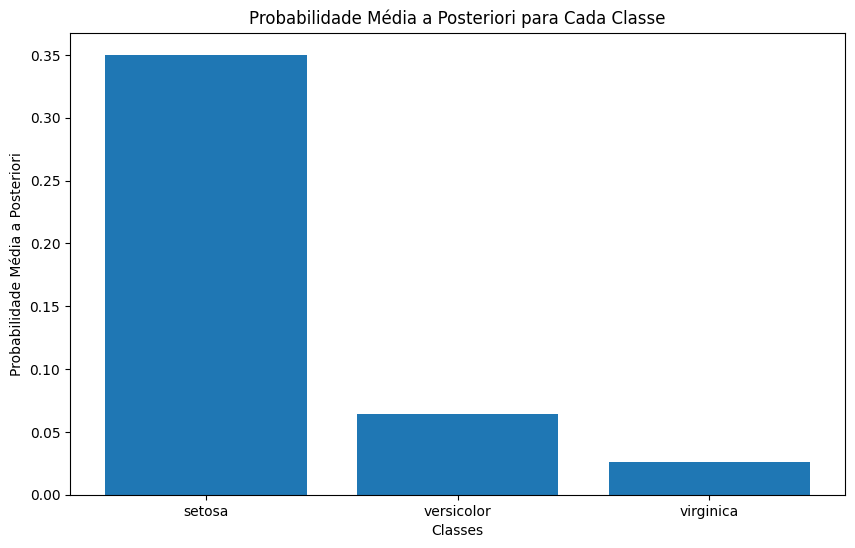

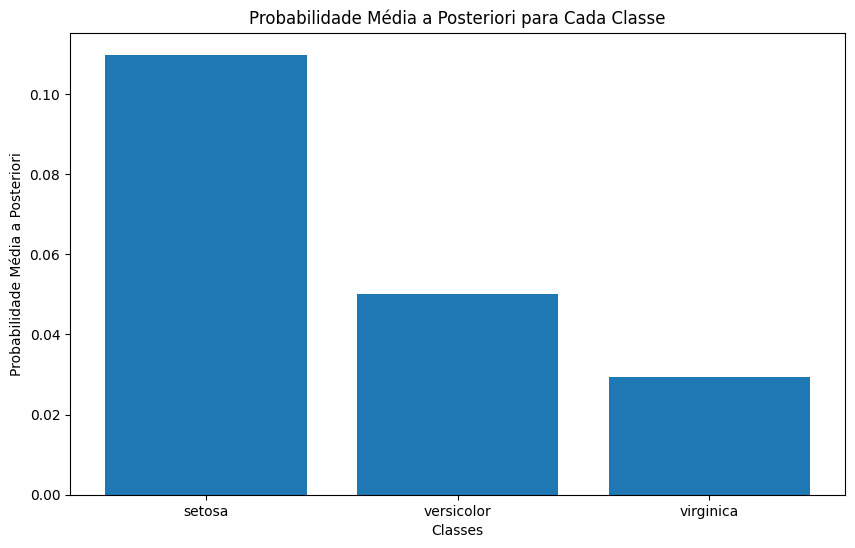

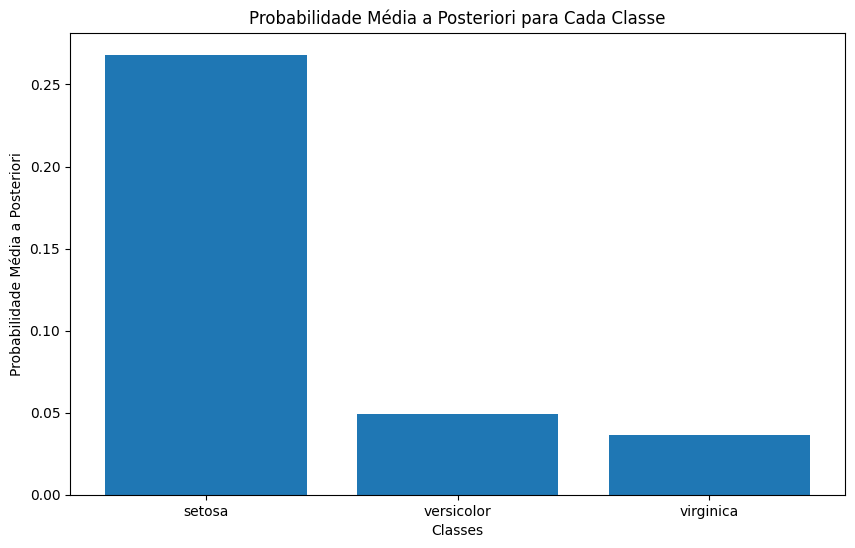

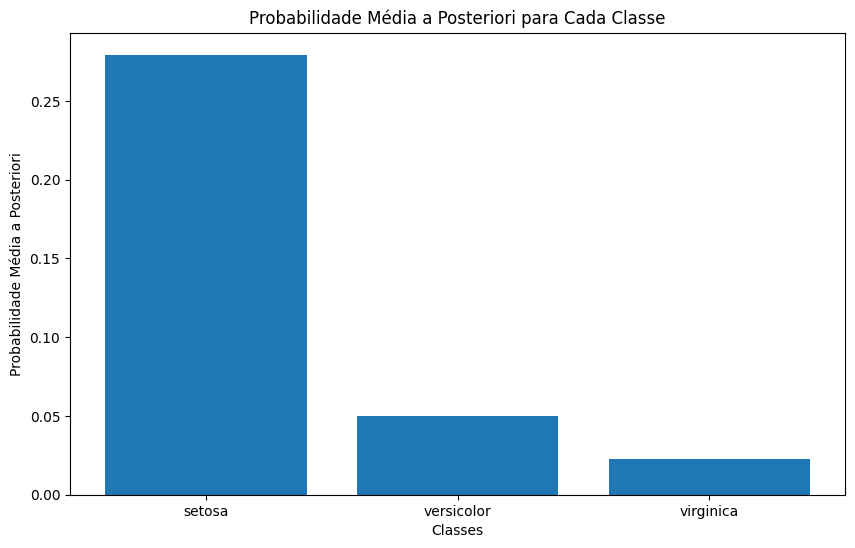

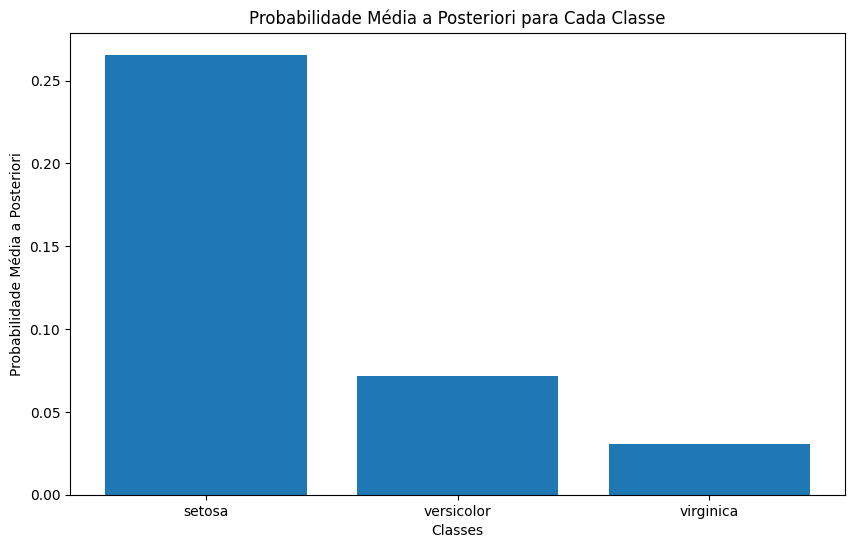

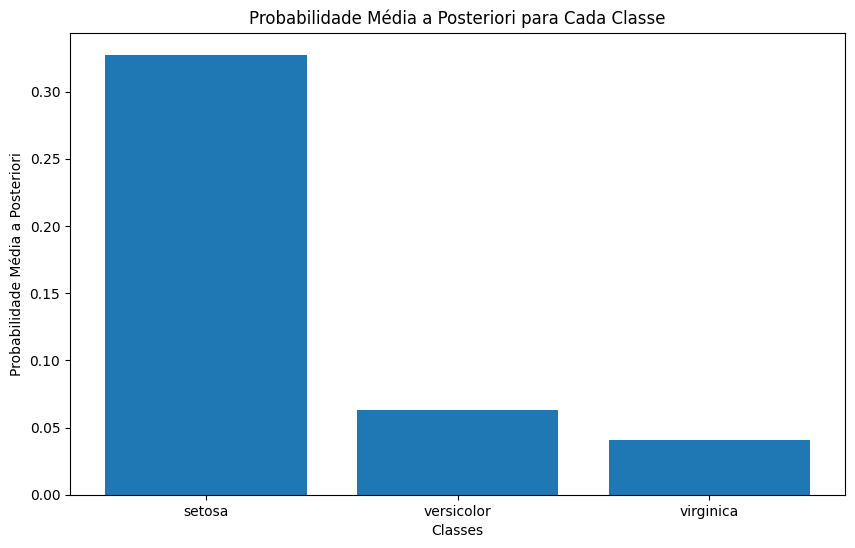

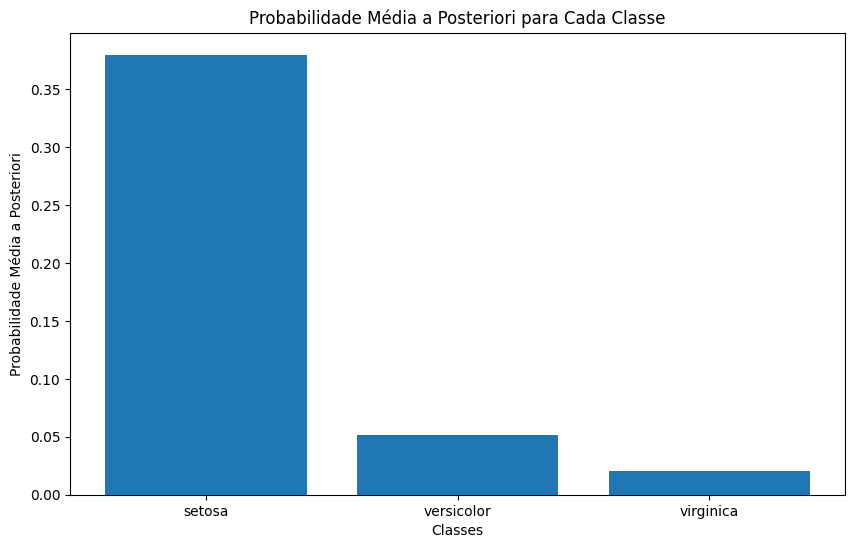

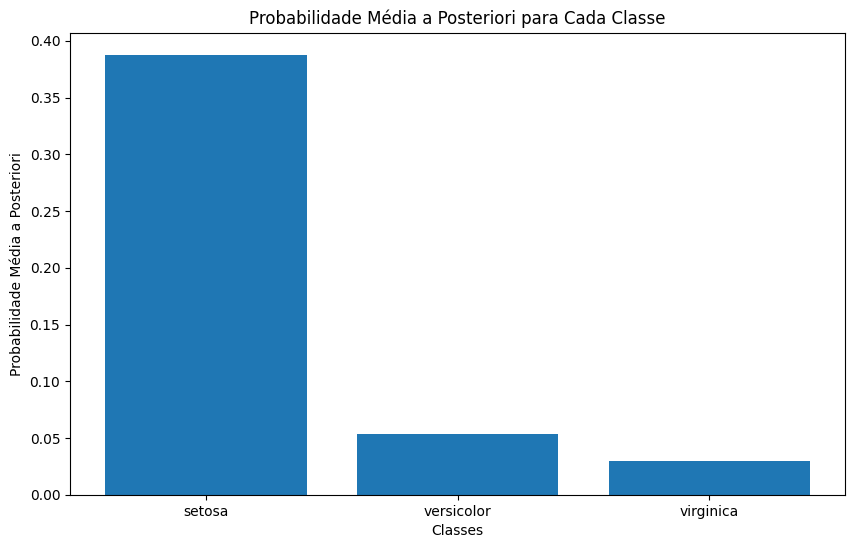

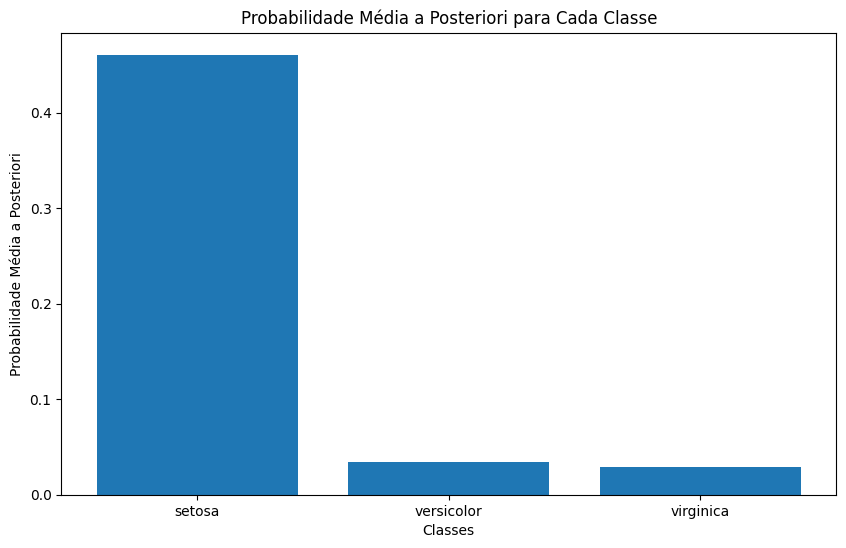

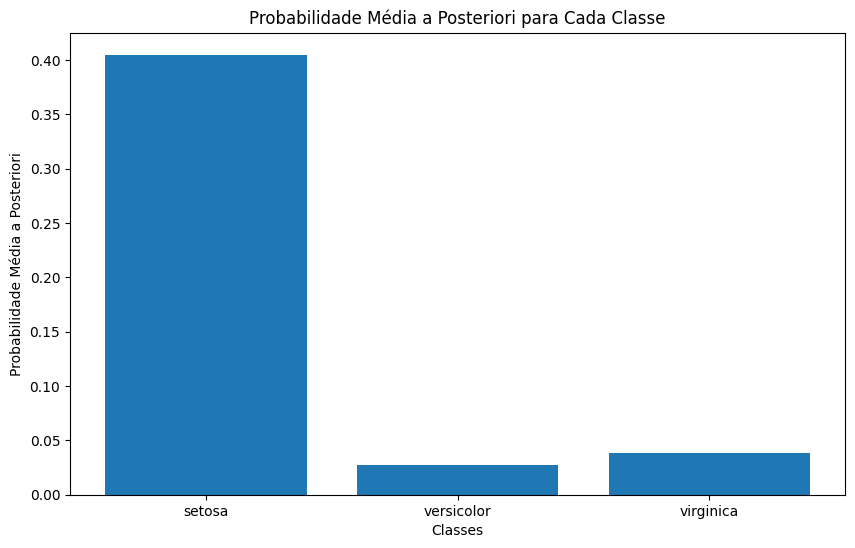

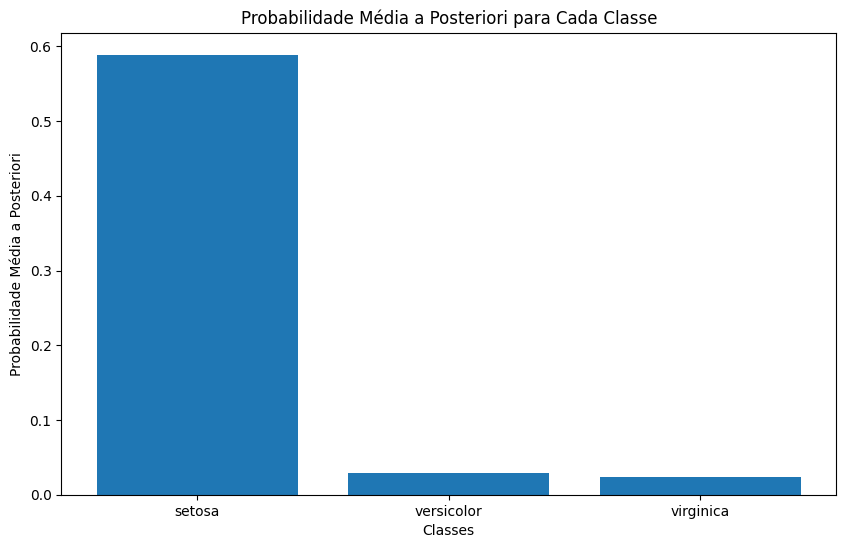

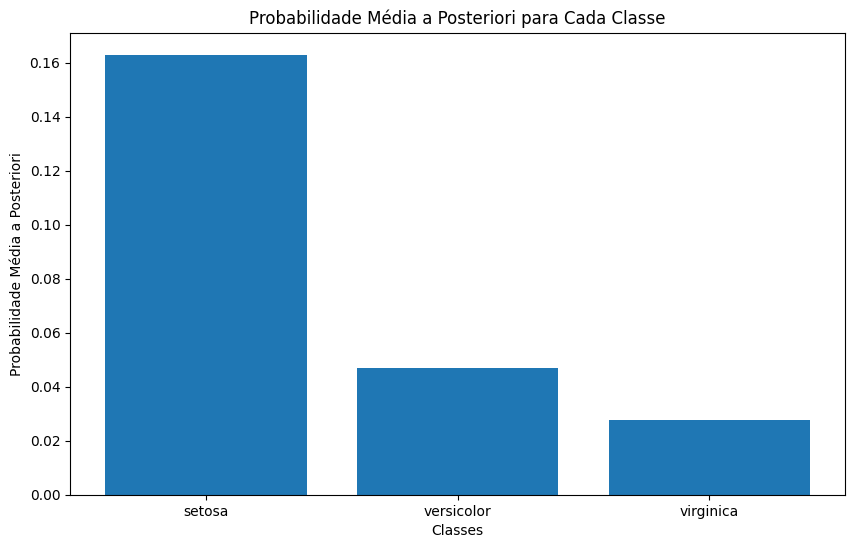

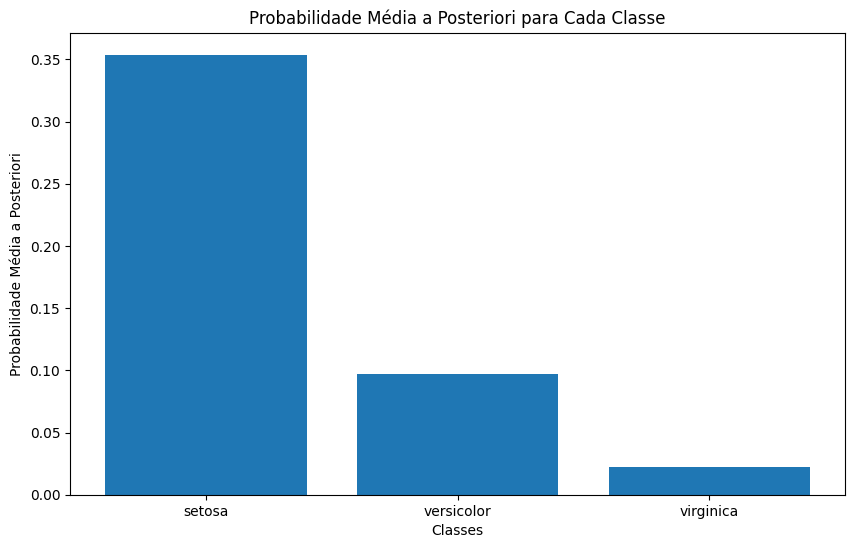

Acurácia média: 0.9466666666666665
Desvio padrão da acurácia: 0.024494897427831775
Melhor realização (índice): 0
Matriz de confusão da melhor realização:
[[ 7  0  0]
 [ 0 11  2]
 [ 0  0 10]]


In [70]:
# plot_decision_surface(nb_classifier, X_train, y_train, "teste")
mean_acc, std_dev_acc, best_realization_idx, best_conf_matrix = perform_realizations(nb_classifier, X, y)

print(f"Acurácia média: {mean_acc}")
print(f"Desvio padrão da acurácia: {std_dev_acc}")
print(f"Melhor realização (índice): {best_realization_idx}")
print(f"Matriz de confusão da melhor realização:\n{best_conf_matrix}")


In [71]:
# # Plotando a verossimilhança e a probabilidade posteriori média para cada classe
# plt.figure(figsize=(10, 6))
# plt.bar(range(len(mean_class_posteriors)), mean_class_posteriors.values())
# plt.xlabel('Classes')
# plt.ylabel('Probabilidade Média a Posteriori')
# plt.title('Probabilidade Média a Posteriori para Cada Classe')
# plt.xticks(range(len(mean_class_posteriors)), iris.target_names)
# plt.show()



# # Plotando a matriz de confusão
# conf_matrix = confusion_matrix(y_test, predictions)
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.title('Matriz de Confusão')
# plt.show()